## Try 12.2.1: Perceptron models in Python.

**The Haberman's Survival Dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. The dataset contains four features: the patient's age, year of surgery, number of cancer nodes detected, and whether the patient survived after 5 years.**

**The Python code below creates a perceptron model that predicts whether a patient survived based on age, year of surgery, and number of cancer nodes detected.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**
* **Change the learning rate from 0.1 to 0.05. Explore any changes in the output.**

In [1]:
# Loads the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Loads haberman.csv
haberman = pd.read_csv('haberman.csv')

In [5]:
haberman

,Age,Year,Nodes,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,0


In [7]:
# Slices the features of the dataset
X = haberman[['Age', 'Year', 'Nodes']]
y = haberman[["Survived"]]

In [8]:
# Scales the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=['Age', 'Year', 'Nodes'])

In [9]:
X_scaled

,Age,Year,Nodes
0,-2.082140,0.353584,-0.421592
1,-2.082140,-0.262921,-0.142959
2,-2.082140,0.661837,-0.560909
3,-1.989426,-1.187680,-0.282275
4,-1.989426,0.661837,-0.003642
...,...,...,...
301,2.090018,-0.262921,-0.421592
302,2.182732,1.278342,-0.560909
303,2.275447,0.661837,-0.142959
304,2.368162,0.661837,-0.421592


In [10]:
# Splits the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=123
)

In [11]:
# Initializes and fits a perceptron model
clf = Perceptron(tol=0.00001, eta0=0.1, max_iter=20000);
clf.fit(X_train, np.ravel(y_train));

In [12]:
# Creates a list of predictions from the test features
y_pred = clf.predict(X_test)

In [13]:
# Show model predictions
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [14]:
# Show actual values
np.ravel(y_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [15]:
# Finds the weights
print(clf.coef_)
print(clf.intercept_)

[[-0.20821401 -0.0879427  -0.30686072]]
[0.1]


In [16]:
# Finds the accuracy score
accuracy_score(y_pred, y_test)

0.6774193548387096

<Axes: >

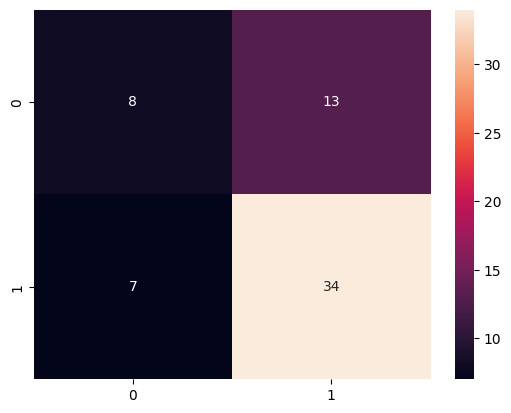

In [17]:
# Displays a heatmap for the confusion matrix
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

In [18]:
# Displays the classification report for the model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.53      0.38      0.44        21
           1       0.72      0.83      0.77        41

    accuracy                           0.68        62
   macro avg       0.63      0.61      0.61        62
weighted avg       0.66      0.68      0.66        62



## challenge activity|12.2.2: Single-layer perceptron using scikit-learn.

## 1)
**This dataset contains 13 health-related attributes from 100 patients and one attribute denoting whether or not the patient has heart disease.**
  *  **Initialize a perceptron model pModel with a maximum of 1500 epochs and a learning rate of 0.2.**

**The code contains all imports, loads the dataset, splits the dataset into test and train data, fits the model, and prints the weights of the fitted perceptron model.**

In [11]:
# Import packages and functions
import numpy as np
import pandas as pd

In [13]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# Load the dataset
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
1,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
2,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
3,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
4,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1


In [ ]:
# Slices the features of the dataset
X = heart[['trestbps', 'age', 'thalach']]
y = heart[['target']]

# Scales the features
scaler = StandardScaler()
XScaled = pd.DataFrame(scaler.fit_transform(X), columns=['trestbps','age','thalach'])

# Splits the data into train and test sets
XTrain, XTest, yTrain, yTest = train_test_split(XScaled, y, test_size=0.2, random_state=123)

# Initializes and fits a perceptron model
pModel = # Your code goes here
pModel.fit(XTrain, np.ravel(yTrain))

print(pModel.coef_)
print(pModel.intercept_)

## 2)
**This dataset contains 13 health-related attributes from 100 patients and one attribute denoting whether or not the patient has heart disease.**

* **Fit a perceptron model to the training data.**
* **Display the weights for the input features and the bias term for the fitted model, in that order.**

**The code contains all imports, loads the dataset, splits the data into test and train data, and initializes the model.**

In [ ]:

# Initializes a perceptron model
pModel = Perceptron(eta0=0.25, max_iter=1000)

# Fits a perceptron model
# Your code goes here

# Finds the weights
print(# Your code goes here)
print(# Your code goes here)

## 3)
**This dataset contains 13 health-related attributes from 100 patients and one attribute denoting whether or not the patient has heart disease.**

* **Predict the target values for a test set.**
* **Print the accuracy score.**
  
**The code contains all imports, loads the dataset, splits the dataset into test and train data, initializes the model, and fits the model.**

In [ ]:

# Initializes a perceptron model
pModel = Perceptron(eta0=0.1, max_iter=1500)

# Fits a perceptron model
pModel.fit(XTrain, np.ravel(yTrain))

# Creates a list of predictions from the test features
yPredicted = # Your code goes here

# Prints accuracy score
# Your code goes here

## Solution

1) pModel = Perceptron(eta0=0.2, max_iter=1500

2) pModel.fit(XTrain, np.ravel(yTrain))

    # Finds the weights
    print(pModel.coef_)
    print(pModel.intercept_)

3) yPredicted = pModel.predict(XTest)

    # Prints accuracy score
    print(accuracy_score(yPredicted, yTest))

